In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataframe=pd.read_csv("/content/diabetes.csv")

In [3]:
np.random.seed(93)

In [4]:
sample_data = dataframe.sample(n=25)

In [5]:
population_mean = dataframe['Glucose'].mean()
population_highest = dataframe['Glucose'].max()

sample_mean = sample_data['Glucose'].mean()
sample_highest = sample_data['Glucose'].max()

In [9]:
print(population_mean)
print(population_highest)
print(sample_mean)
print(sample_highest)

120.89453125
199
125.6
197


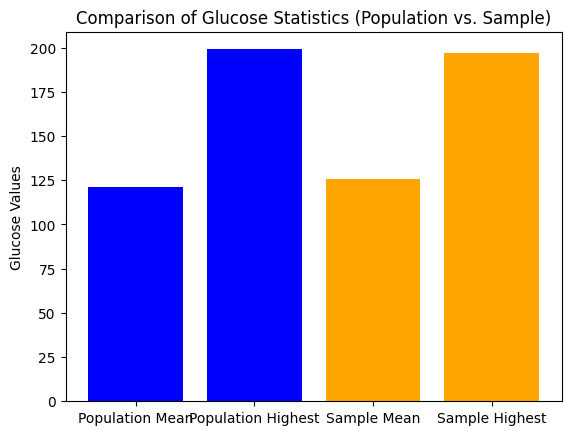

In [6]:
labels = ['Population Mean', 'Population Highest', 'Sample Mean', 'Sample Highest']
values = [population_mean, population_highest, sample_mean, sample_highest]

plt.bar(labels, values, color=['blue', 'blue', 'orange', 'orange'])
plt.ylabel('Glucose Values')
plt.title('Comparison of Glucose Statistics (Population vs. Sample)')
plt.show()

In [7]:
#2
population_98th_percentile_bmi = np.percentile(dataframe['BMI'], 98)
sample_98th_percentile_bmi = np.percentile(sample_data['BMI'], 98)


In [10]:
print(population_98th_percentile_bmi)
print(sample_98th_percentile_bmi)

47.52599999999996
48.099999999999994


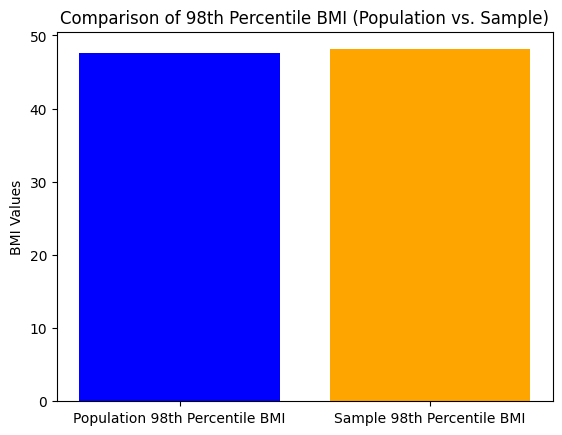

In [8]:
labels = ['Population 98th Percentile BMI', 'Sample 98th Percentile BMI']
values = [population_98th_percentile_bmi, sample_98th_percentile_bmi]

plt.bar(labels, values, color=['blue', 'orange'])
plt.ylabel('BMI Values')
plt.title('Comparison of 98th Percentile BMI (Population vs. Sample)')
plt.show()

In [11]:
num_bootstrap_samples = 500
sample_size = 150

In [12]:
bootstrap_means = []
bootstrap_std_devs = []
bootstrap_percentiles = []

In [14]:
for _ in range(num_bootstrap_samples):
    bootstrap_sample = dataframe['BloodPressure'].sample(sample_size, replace=True)

    bootstrap_mean = bootstrap_sample.mean()
    bootstrap_std_dev = bootstrap_sample.std()
    bootstrap_percentile = np.percentile(bootstrap_sample, 95)

    bootstrap_means.append(bootstrap_mean)
    bootstrap_std_devs.append(bootstrap_std_dev)
    bootstrap_percentiles.append(bootstrap_percentile)

In [16]:
population_mean_bp = dataframe['BloodPressure'].mean()
population_std_dev_bp = dataframe['BloodPressure'].std()
population_percentile_95_bp = np.percentile(dataframe['BloodPressure'], 95)


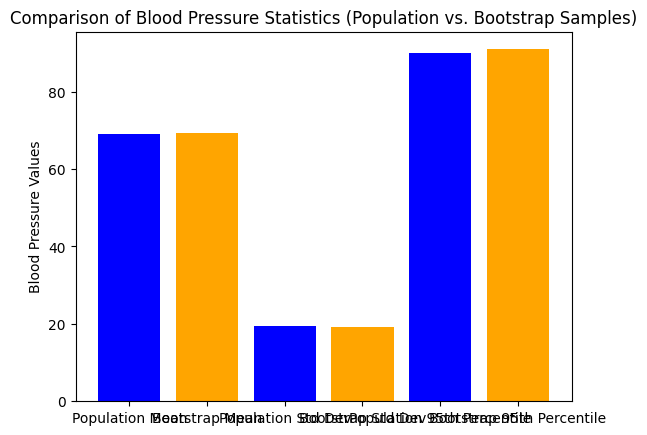

In [17]:
labels = ['Population Mean', 'Bootstrap Mean', 'Population Std Dev', 'Bootstrap Std Dev', 'Population 95th Percentile', 'Bootstrap 95th Percentile']
values = [population_mean_bp, np.mean(bootstrap_means), population_std_dev_bp, np.mean(bootstrap_std_devs), population_percentile_95_bp, np.mean(bootstrap_percentiles)]

plt.bar(labels, values, color=['blue', 'orange', 'blue', 'orange', 'blue', 'orange'])
plt.ylabel('Blood Pressure Values')
plt.title('Comparison of Blood Pressure Statistics (Population vs. Bootstrap Samples)')
plt.show()

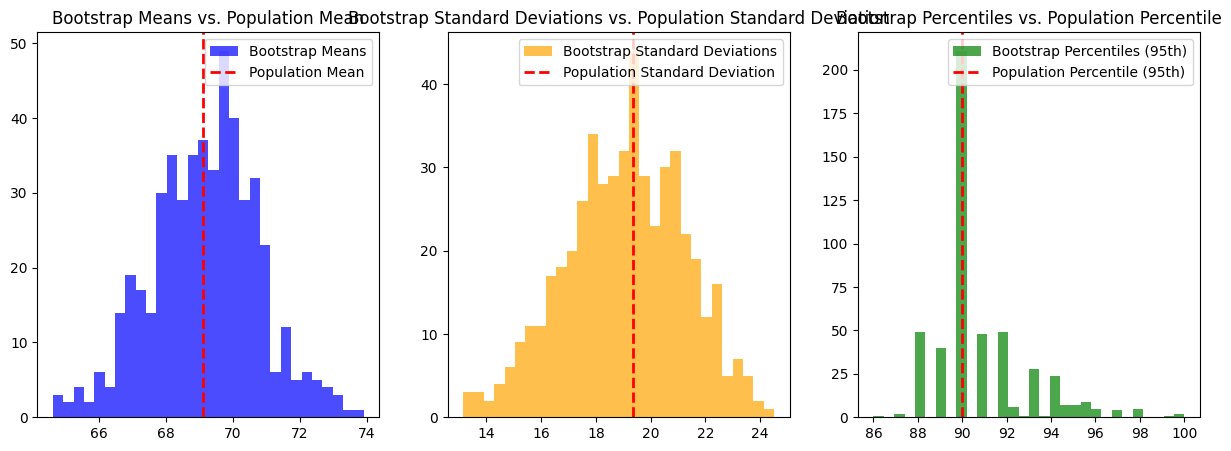

In [19]:
#or
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(bootstrap_means, bins=30, color='blue', alpha=0.7, label='Bootstrap Means')
plt.axvline(x=population_mean_bp, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
plt.title('Bootstrap Means vs. Population Mean')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(bootstrap_std_devs, bins=30, color='orange', alpha=0.7, label='Bootstrap Standard Deviations')
plt.axvline(x=population_std_dev_bp, color='red', linestyle='dashed', linewidth=2, label='Population Standard Deviation')
plt.title('Bootstrap Standard Deviations vs. Population Standard Deviation')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(bootstrap_percentiles, bins=30, color='green', alpha=0.7, label='Bootstrap Percentiles (95th)')
plt.axvline(x=population_percentile_95_bp, color='red', linestyle='dashed', linewidth=2, label='Population Percentile (95th)')
plt.title('Bootstrap Percentiles vs. Population Percentile')
plt.legend()

plt.show()